In [61]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Importing keras 
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
# !pip install tensorflow==2.0.0

In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# Data loading and preprocessing

In [4]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/content')

Mounted at /content/drive


In [5]:
# df_bankdata = pd.read_csv('bank.csv')
# df_bankdata = files.upload()

df_bankdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv')

# df_bankdata = pd.read_csv("./My Drive/Colab Notebooks/bank.csv")


In [6]:
df_bankdata

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
print('')
print('Count of rows and columns present in dataset')
print('')
df_bankdata.shape


Count of rows and columns present in dataset



(10000, 14)

There are 10000 rows and 14 columns in the dataset

In [8]:
# Check if there are any null values in data set
df_bankdata.isnull().values.any() 

False

There are no NULL values in the dataset

In [9]:
df_bankdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
print('')
print('Info about dataset')
print('')
df_bankdata.info()


Info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Observation

There are 10000 rows and 14 columns in the dataset

There is one target variable that determines the status of the customer - Exited, which may be influenced by all or some of the other fields.

Below is the feature analysis:

    RowNumber: This field is a running sequence number that uniquely identifies the record.

    CustomerId: This field is used to uniquely identify a customer. By analyzing the values, this looks like a non-intelligent sequence number that doesn't affect the target variable

    Surname: This field stores the surname of the customer. This is used to identify the customer and doesn't affect the target variable.

    Credit Score: This field determines the customer's ability to pay back the borrowed amount. From the data, it is a 3-digit number that determines creditworthiness, which affects the target variable.

    Geography: This field stores the country to which the customer belongs. This could be a potential factor determining the longevity of a customer's relation with the bank.
    
    Gender: This field stores the gender of the customer. It needs further analysis to decide if it might impact the target variable. 
    
    Age: This field stores the age of the customer. It needs further analysis to decide if it might impact the target variable. 
    
    Tenure: This field stores the period of time a customer has been associated with the bank. From first look of the data, it seems to be measured in years. This will have an impact on the target variable.

    Balance: This field stores the amount of money deposited in the bank account of the customer. This will have a direct impact on the target variable.
    
    NumOfProducts: This field stores the number of accounts and affiliated products the customer has with the bank. This will have an impact on the target variable. The more products they use, the longer they will remain with the bank.

    HasCrCard: This field tells if the customer has a credit card issued by the bank. This will have an impact on the target variable.
    
    IsActiveMember: This field indicates if the member is active in terms of the bank's products. If the account had been dormant for a long time, there is a higher chance that he/she will leave the bank.
    
    EstimatedSalary: This field stores the estimated salary of the customer. This could have a huge influence on the customer staying with the bank for a longer time.
    
    Exited: This field stores the target variable. It indicates if the customer did leave the bank in the past. Based on the other fields, this would be the variable to predict for any new dataset coming in.

In [11]:
df_bankdata.describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.0,2887.0,1.0,2501.0,5000.0,7500.0,10000.0
CustomerId,10000.0,15690941.0,71936.0,15565701.0,15628528.0,15690738.0,15753234.0,15815690.0
CreditScore,10000.0,651.0,97.0,350.0,584.0,652.0,718.0,850.0
Age,10000.0,39.0,10.0,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,3.0,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76486.0,62397.0,0.0,0.0,97199.0,127644.0,250898.0
NumOfProducts,10000.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,100090.0,57510.0,12.0,51002.0,100194.0,149388.0,199992.0


In [12]:
# Duplicates Check
[df_bankdata.duplicated()] == 'False'

False

In [13]:
# Check for null values

df_bankdata.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df_bankdata['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
# df_bankdata.head()
df_bankdata.describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.0,2887.0,1.0,2501.0,5000.0,7500.0,10000.0
CustomerId,10000.0,15690941.0,71936.0,15565701.0,15628528.0,15690738.0,15753234.0,15815690.0
CreditScore,10000.0,651.0,97.0,350.0,584.0,652.0,718.0,850.0
Age,10000.0,39.0,10.0,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,3.0,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76486.0,62397.0,0.0,0.0,97199.0,127644.0,250898.0
NumOfProducts,10000.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,100090.0,57510.0,12.0,51002.0,100194.0,149388.0,199992.0


# Observations

    As inferred before, the variables RowNumber, CustomerId and Surname can be ignored since these have no influence in the target variable.
    
    The dataset contains data of customers belonging to France, Spain and Germany. 
    
    While there are no NULL values, there are zeroes present in the dataset for 3 variables:
        Balance - This is a valid business scenario and need not be treated for imputation.
        HasCrCard - This is a categorical variable which provides a Yes/No response.
        IsActiveMember - This is a categorical variable which provides a Yes/No response.
    
    
    There are no duplicate records.
    
    The variables belong to different scales with Balance ranging between 0 and ~250000, EstimatedSalary ranging between 12 and ~200000, Age between 18 and 92 with other variables ranging between 0 and 10.
    This indicates that the dataset needs to be scaled before being used in the algorithms.
    
# Feature-wise Observation
RowNumber
    
    Sequence value. Can be ignored.

CustomerId

    Identifier. Can be ignored.
    
Surname

    Name. Can be ignored.
    

CreditScore

    Average credit score is 651. 
    The lowest value is 350 and highest is 850.
    The interquartile range for age of concrete is 718-584 = 124.     

Geography and Gender are categorical variables that need to be encoded using one-hot encoding.

Age

    Average age is 39. 
    The lowest age is 18 and highest is 92.
    The interquartile range for age is 44-32 = 12.     

Values for Tenure & NumOfProducts fall between 0 and 10.

Balance and EstimatedSalary are amounts measured in USD, Balance ranging between 0 and ~250000 and EstimatedSalary between 12 and ~200000.

HasCrCard and IsActiveMember are categorical variables with values 0 and 1 indicating a Yes/No response.

Exited is the class variable that needs to be predicted.

In [16]:
# Create new dataset to be used for training by dropping Sl_No & Customer ID
df_main = df_bankdata.copy()

df_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Drop RowNumber
df_main.drop('RowNumber', axis=1, inplace = True)


# Drop CustomerId
df_main.drop('CustomerId', axis=1, inplace = True)

# Drop Surname
df_main.drop('Surname', axis=1, inplace = True)

df_main.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


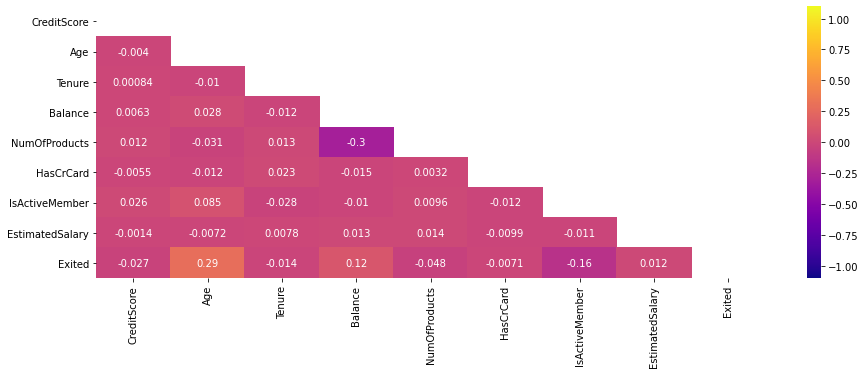

In [18]:
# Correlation Matrix

# To increase the size of the graph
plt.rcParams['figure.figsize'] = (15,5)

corr = df_main.corr()
display(corr)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1.1,vmax=1.1, cmap='plasma')

There are no highly correlated variables

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


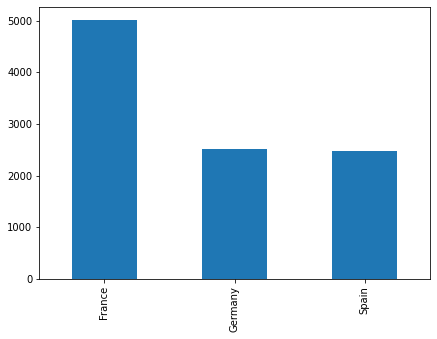

In [19]:
print(df_main.Geography.value_counts())
# To increase the size of the graph
plt.rcParams['figure.figsize'] = (7,5)

df_main['Geography'].value_counts().plot(kind='bar')

Male      5457
Female    4543
Name: Gender, dtype: int64


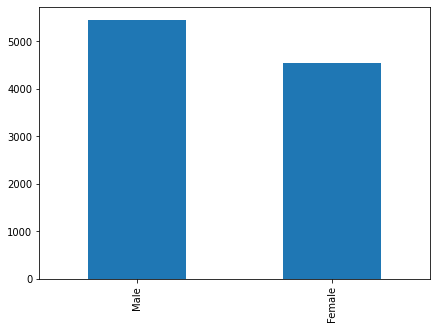

In [20]:
print(df_main.Gender.value_counts())

# To increase the size of the graph
plt.rcParams['figure.figsize'] = (7,5)
df_main['Gender'].value_counts().plot(kind='bar')

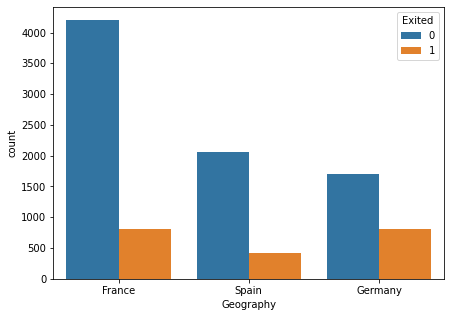

<Figure size 360x360 with 0 Axes>

In [21]:
x = sns.countplot(x="Geography", hue="Exited", data=df_main)

# To increase the size of the graph
plt.rcParams['figure.figsize'] = (5,5)

plt.show()

# To change angle of labels to avoid overlapping
x.set_xticklabels(x.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

# To increase label text size
SMALL_SIZE = 10
MEDIUM_SIZE = 15
LARGE_SIZE = 20

plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

# # To increase the size of the graph
# plt.rcParams['figure.figsize'] = (30,10)

# To display the graph
plt.show()

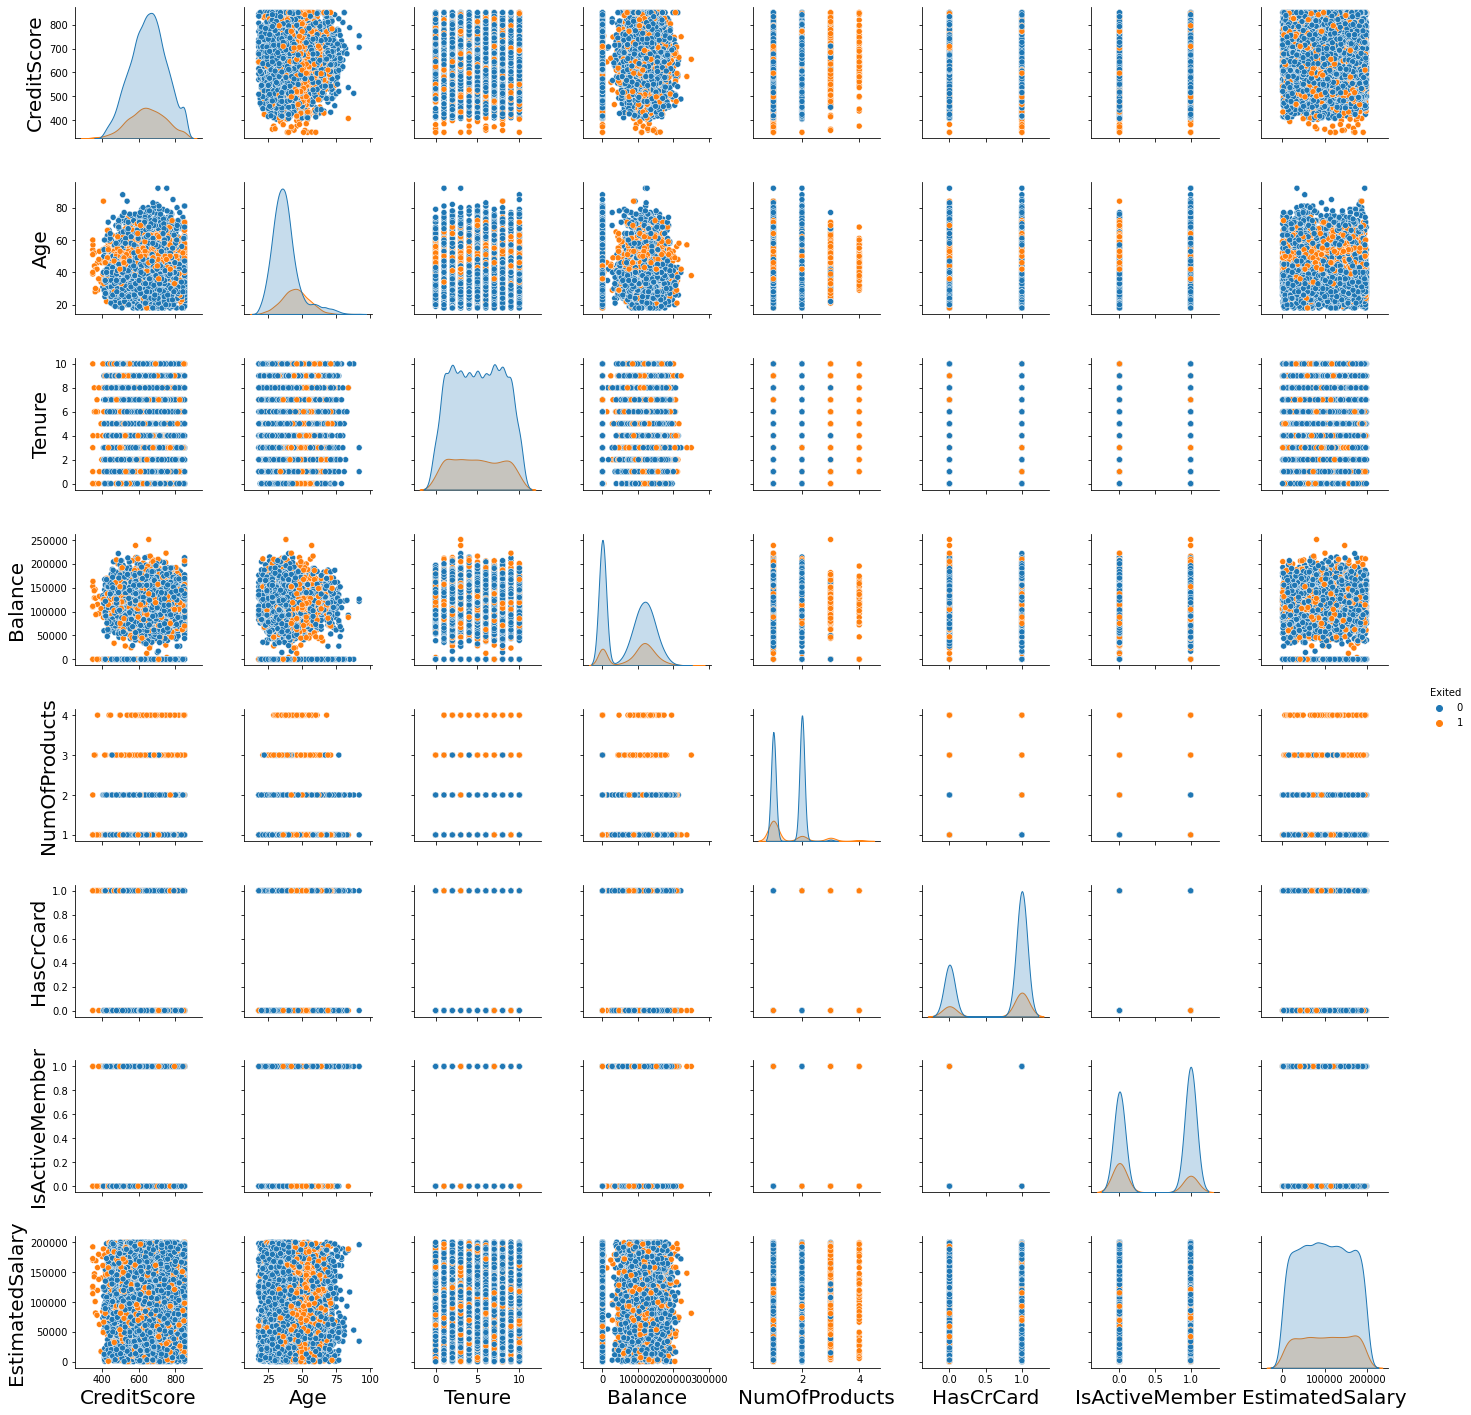

In [22]:
sns.pairplot(df_main, hue = 'Exited')

In [23]:
# Create a backup of df_main before assigning categories
df_main_bkp = df_main.copy()
df_main_bkp.shape

(10000, 11)

In [24]:
# To revert df_main back to original in case of issues
# Uncomment and run only if needed
df_main = df_main_bkp.copy()
df_main.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [25]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [26]:
oneHotCols=["Geography","Gender"]

df_main=pd.get_dummies(df_main, columns=oneHotCols)
df_main.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [27]:
#To drop duplicate records
df_main.drop_duplicates()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [28]:
#creating dummy variables for the categorical features
df_main = pd.get_dummies(df_main)
df_main = df_main.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
df_main

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640625,0.0,1.0,0.0,0.0,0.0,1.0
9996,516.0,35.0,10.0,57369.609375,1.0,1.0,1.0,101699.773438,0.0,1.0,0.0,0.0,0.0,1.0
9997,709.0,36.0,7.0,0.000000,1.0,0.0,1.0,42085.578125,1.0,1.0,0.0,0.0,1.0,0.0
9998,772.0,42.0,3.0,75075.312500,2.0,1.0,0.0,92888.523438,1.0,0.0,1.0,0.0,0.0,1.0


In [46]:
#getting the features and labels and splitting the test and train data.


X = df_main.drop('Exited', axis = 1)
Y = df_main['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#Scaling the data as features are on different scales

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train
X_test

array([[0.39999998, 0.39189193, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.65999997, 0.21621624, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.362     , 0.32432434, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.43400002, 0.21621624, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.54200006, 0.16216215, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.61      , 0.45945945, 0.90000004, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [47]:
# Converting data elements into tensors
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train.values)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test.values)

In [48]:
X_train.shape

TensorShape([8000, 13])

In [50]:
# Initializing the Neural Network
class_bank = Sequential()

In [51]:
# input layer and the first hidden layer
class_bank.add(Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform"))

In [52]:
# second hidden layer
class_bank.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [53]:
# output layer
class_bank.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [54]:
# DNN Compilation
class_bank.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
# Fit DNN to the Training set
class_bank.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
800/800 [==============================] - 2s 1ms/step - loss: 0.5778 - accuracy: 0.7937
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4767 - accuracy: 0.7954
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.7897
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4625 - accuracy: 0.7943
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4439 - accuracy: 0.8032
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4461 - accuracy: 0.7930
Epoch 7/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4421 - accuracy: 0.8011
Epoch 8/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4420 - accuracy: 0.8113
Epoch 9/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.8200
Epoch 10/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4354 - accuracy: 0.8120

In [56]:
# Predict results based on test set
y_pred = class_bank.predict(X_test)

In [57]:
# Predicting results with a threshold of 0.5
y_pred = (y_pred > 0.5)

In [58]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [68]:
# Accuracy score and confusion matrix

cm_bank = confusion_matrix(y_test, y_pred)
acc_bank=accuracy_score(y_test,y_pred)

print('The accuracy of predictions using the above model is:', acc_bank)

The accuracy of predictions using the above model is: 0.835


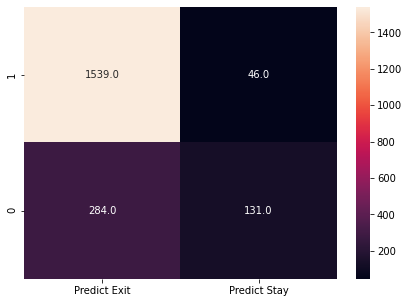

In [66]:
df_cm = pd.DataFrame(cm_bank, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Exit","Predict Stay"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt=".1f")

## Observation
The confusion matrix

True Positives (TP): we correctly predicted that the customer will exit the bank: 1539

True Negatives (TN): we correctly predicted that the customer will not leave the bank(stay): 131

False Positives (FP): we incorrectly predicted that the customer will exit the bank (a "Type I error") 284 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that the customer will stay(a "Type II error") 46 Falsely predict negative Type II error